# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv('../data/Employee.csv')

#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [4]:
# Method 1
# your code here
employees.groupby(by='Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [5]:
# Method 2
# your code here
employees.pivot_table(index='Department', values='Salary',aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [6]:
# your code here
employees.pivot_table(index=['Department','Title'], values='Salary',aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [7]:
# your code here
employees.pivot_table(index=['Department','Title'], values='Salary',columns='Years',aggfunc='mean')

Years                    1     2     3     4     7     8
Department Title                                        
HR         VP          NaN   NaN   NaN   NaN   NaN  70.0
           analyst     NaN  30.0   NaN  35.0   NaN   NaN
IT         VP          NaN   NaN   NaN   NaN   NaN  70.0
           analyst    35.0  30.0   NaN   NaN   NaN   NaN
           associate   NaN   NaN   NaN   NaN  60.0   NaN
Sales      associate   NaN  55.0  55.0   NaN   NaN   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [8]:
# your code here
Contagem_coluna = lambda x: len(x.unique())
employees.pivot_table(index='Department', values=['Salary'],aggfunc=[Contagem_coluna,'mean'])

,<lambda>,mean
,Salary,Salary
Department,,
HR,3,45.00
IT,4,48.75
Sales,1,55.00


#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [9]:
# your code here
employees.pivot_table(index=['Department','Title'],values=['Salary'],aggfunc=['median','min','max','std'])

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [10]:
"""
your commments here

we can see that there is an order of salary and only the analist have a diference betweem the range of salary
"""

'\nyour commments here\n\nwe can see that there is an order of salary and only the analist have a diference betweem the range of salary\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [11]:
# your code here
employees.pivot_table(index=['Department','Title'],values=['Salary'],aggfunc=['median','min','max','std'],fill_value=0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [12]:
# your code here
employees.pivot_table(index='Department',values=['Salary'],aggfunc=[Contagem_coluna,'sum'])

,<lambda>,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,1,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [13]:
# your code here
employees.pivot_table(index=['Department','Title'],values=['Salary','Years'],aggfunc=['mean','sum'])

mean          sum      
                     Salary Years Salary Years
Department Title                              
HR         VP          70.0   8.0     70     8
           analyst     32.5   3.0     65     6
IT         VP          70.0   8.0     70     8
           analyst     32.5   1.5     65     3
           associate   60.0   7.0     60     7
Sales      associate   55.0   2.5    110     5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [14]:
# your code here
employees[['Department','Salary']]

,Department,Salary
0,IT,35
1,IT,30
2,HR,30
3,HR,35
4,Sales,55
5,Sales,55
6,IT,70
7,IT,60
8,HR,70


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [15]:
# your code here
fitbit = pd.read_csv('../data/Fitbit.csv')

In [16]:
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [17]:
# your code here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [18]:
# your code here
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [19]:
# your code here
fitbit[['Minutes Very Active','Steps']].corr()
#correlation not so strong

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [20]:
import matplotlib.pyplot as plt;

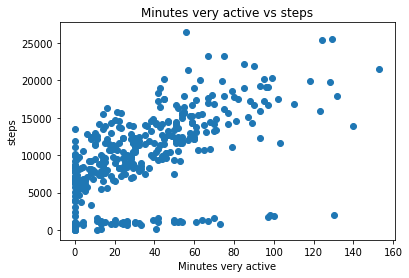

In [21]:
plt.scatter(fitbit['Minutes Very Active'],fitbit['Steps'])
plt.title('Minutes very active vs steps')
plt.xlabel('Minutes very active')
plt.ylabel('steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [22]:
"""
your commments here

they have a positive relation but not so strong
"""

'\nyour commments here\n\nthey have a positive relation but not so strong\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [27]:
# your code here
fitbit[['Minutes Sedentary','Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

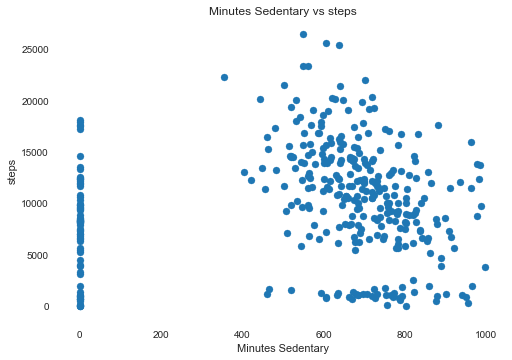

In [29]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'],fitbit['Steps'])
plt.title('Minutes Sedentary vs steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('steps')
plt.show()


In [ ]:
"""
your commments here

They have weak correlation
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [31]:
# your code here
fitbit[['MinutesOfSleep','Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

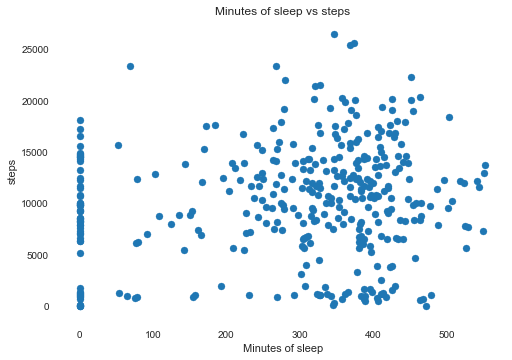

In [32]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'],fitbit['Steps'])
plt.title('Minutes of sleep vs steps')
plt.xlabel('Minutes of sleep')
plt.ylabel('steps')
plt.show()

In [ ]:
"""
your commments here

Weak correlation
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [33]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [36]:
# your code here
cor_fit =fitbit[columns].corr()

In [37]:
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [45]:
# your code here
cor_fit.sort_values(by='Steps')
#no strong correlation because all correlations are lower than 0.

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986


In [44]:
Lower_to_higher_corr = cor_fit.sort_values(by='Steps').index
Lower_to_higher_corr

Index(['Minutes Sedentary', 'MinutesOfSleep', 'Calorie burned', 'Floors',
       'Minutes Very Active', 'Steps'],
      dtype='object')

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [47]:
# your code here
times_grades = pd.read_csv('../data/Time_Grades.csv')

In [52]:
times_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

In [48]:
import seaborn as sns

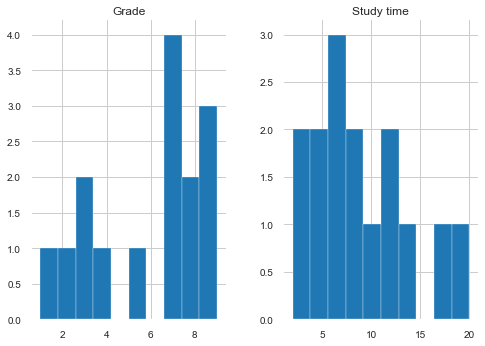

In [51]:
# your code here
times_grades.hist()
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [53]:
# your code here
times_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [55]:
# your code here
times_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
your commments here

Yes, there is. They are both strong in both methods because they are higher then 0.7
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

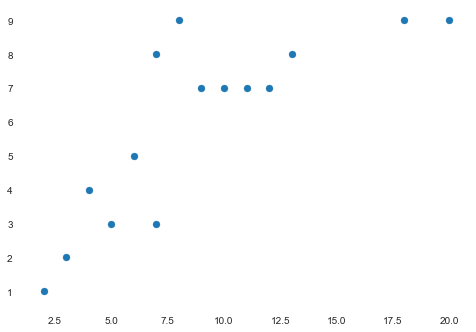

In [56]:
# your code here
plt.scatter(times_grades['Study time'],times_grades['Grade'])

In [ ]:
"""
your commments here

They are both strong in both methods because they are higher then 0.7 and looking at the graphich(also because
correlation is positive) it is a positive corelation. We cant say who causes who but they are correlated

"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [57]:
"""
your commments here

Yup

In statistics, Spearman's rank correlation coefficient or Spearman's ρ, named after Charles Spearman and often denoted by the Greek letter {\displaystyle \rho }\rho  (rho) or as {\displaystyle r_{s}}r_{s}, is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.

The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

Intuitively, the Spearman correlation between two variables will be high when observations have a similar (or identical for a correlation of 1) rank (i.e. relative position label of the observations within the variable: 1st, 2nd, 3rd, etc.) between the two variables, and low when observations have a dissimilar (or fully opposed for a correlation of −1) rank between the two variables.

Spearman's coefficient is appropriate for both continuous and discrete ordinal variables.[1][2] Both Spearman's {\displaystyle \rho }\rho  and Kendall's {\displaystyle \tau }\tau  can be formulated as special cases of a more general correlation coefficient.

for further information you can check https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

:D

"""

"\nyour commments here\n\nYup\n\nIn statistics, Spearman's rank correlation coefficient or Spearman's ρ, named after Charles Spearman and often denoted by the Greek letter {\\displaystyle \rho }\rho  (rho) or as {\\displaystyle r_{s}}r_{s}, is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.\n\nThe Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.\n\nIntuitively, the Spearman correlation between two variables will be high when observations have a similar 